# Importing image and conversion into grayscale.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image,ImageOps

#importing the image
image=Image.open("Chess.jpg")

#convert the RGBA image to grayscale
gray=ImageOps.grayscale(image)

#convert into grayscale image
img_array=np.array(gray)

#check
print(img_array)

print(np.shape(img_array))
print(np.ndim(img_array))


M,N = img_array.shape

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(680, 880)
2


## Sobel X

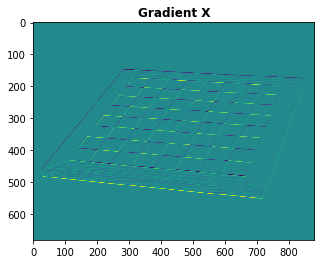

In [9]:
# This is sobel X filter.
wx = np.array([[-1, -2, -1],
              [0, 0, 0],
              [1, 2, 1]])

# To store our updated image.
copyx = np.zeros((M,N))
np.copyto(copyx, img_array)

for i in np.arange(0, M):
    for j in np.arange(0, N):
        sum1 = 0 
        sum2 = 0
        for s in np.arange(-1, 2):
            for t in np.arange(-1, 2):
                x = i + s 
                y = j + t
                if x<0:
                    x=0
                if x>679:
                    x = 679
                if y<0:
                    y=0
                if y>879:
                    y = 879
                p1 = img_array[x, y]
                p2 = wx[s+1, t+1]

                sum1 = sum1 + p1*p2

        copyx.itemset((i, j), sum1)
        

plt.title("Gradient X",fontweight = "bold")
plt.imshow(copyx);
im = Image.fromarray(copyx)

# Sobel Y

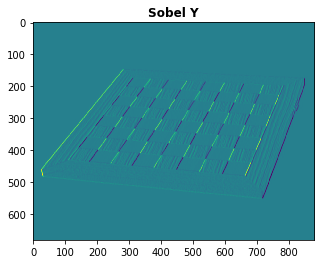

In [12]:
# This is sobel Y filter.
wy = np.array([[2,1,0,-1,-2],
              [2,1,0,-1,-2],
              [4,2,0,-2,-4],
              [2,1,0,-1,-2],
              [2,1,0,-1,-2]])

# To store our updated image.
copyy = np.zeros((M,N))
np.copyto(copyy, img_array)

for i in np.arange(0, M):
    for j in np.arange(0, N):
        sum1 = 0 
        sum2 = 0
        for s in np.arange(-2, 3):
            for t in np.arange(-2, 3):
                x = i + s 
                y = j + t
                if x<0:
                    x=0
                if x>679:
                    x = 679
                if y<0:
                    y=0
                if y>879:
                    y = 879
                p1 = img_array[x, y]
                p2 = wy[s+2, t+2]

                sum1 = sum1 + p1*p2

        copyy.itemset((i, j), sum1)
        

plt.title("Sobel Y",fontweight = "bold")
plt.imshow(copyy);
im = Image.fromarray(copyy)

# Threshold 

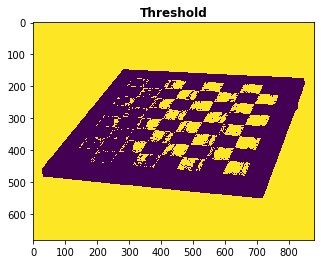

In [14]:
# To store our updated image.
copy = np.zeros((M,N))
np.copyto(copy, img_array)

for i in np.arange(0, M):
    for j in np.arange(0, N):
        if copy[i][j] > 200:
            copy[i][j] = 255
        else:
            copy[i][j] = 0
            
plt.title("Threshold",fontweight = "bold")
plt.imshow(copy);
im = Image.fromarray(copy)